# PRAT : Vessel segmentation notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import load_json, get_vessels_bounding_box
from preprocessing import read_czi, read_tif, apply_mask, roi_mask, vessels_mask
from plot_functions import preprocessing_plot, single_image_plot, contour_plot

### Preprocessing

In [3]:
# FILES 
filenames = [
    '0_6',
    '2_2',
    '4_1',
    '5_1', 
]
# select file idx within [0 : 3] in the upcoming methods
crop_dict = load_json()

In [74]:
# read czi and tif 
_, g, h = read_czi('./scenes/', 2, crop_dict) 
tif = read_tif(2, crop_dict, g.shape)

In [75]:
# create and apply masks (roi, vessels) from annotations
roi = roi_mask(tif)

In [6]:
vessels = vessels_mask(tif)

In [76]:
clipped_g = apply_mask(g, roi, g.mean())
clipped_h = apply_mask(h, roi, h.mean())

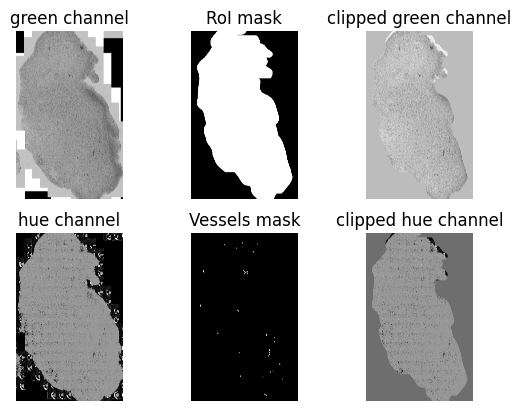

In [312]:
preprocessing_plot(tif, g, h, roi, vessels, clipped_g, clipped_h)

### Morphological filtering 

We extract H and G channels, then, we fill the background, correcting inconstistencies - so that we can focus on the ROI.

In [8]:
from processing import find_vessels, ctl_clot_filter, clear_bb_list
from skimage.morphology import *
from skimage import measure
import numpy as np
from plot_functions import *
from skimage.segmentation import active_contour, morphological_geodesic_active_contour, chan_vese

In [ ]:
clot_mask = ctl_clot_filter(clipped_g, 100, 275)
contours =measure.find_contours(clot_mask) 
bbs = get_vessels_bounding_box(contours)

In [ ]:
bbs = clear_bb_list(bbs, 256//2)

In [ ]:
full_mask, new_bbs, masks = find_vessels(bbs, clipped_g) 

In [ ]:
contour_plot(masks, new_bbs , clipped_g)